In [20]:
import pandas as pd
df = pd.read_csv('titanic-passengers.csv', encoding = "ISO-8859-1",sep=";")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [19]:
import pandas as pd
df = pd.read_csv('titanic-passengers.csv', encoding = "ISO-8859-1",sep=";")
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [10]:
import pandas as pd
df = pd.read_csv('titanic-passengers.csv', encoding = "ISO-8859-1",sep=";")
print(df['Cabin'].head())

print(df['Cabin'].head().isnull())

number_of_elements = len(df["Cabin"])
print("nuber of elements:",number_of_elements)
#number of elements per category
print(df["Cabin"].value_counts())
#replace and display the values
df["Cabin"].fillna('F G35',inplace=True)
df.tail()

0      NaN
1    F G73
2      NaN
3      NaN
4      B71
Name: Cabin, dtype: object
0     True
1    False
2     True
3     True
4    False
Name: Cabin, dtype: bool
nuber of elements: 891
B96 B98        4
C23 C25 C27    4
G6             4
E101           3
C22 C26        3
              ..
D15            1
E12            1
E34            1
A10            1
D48            1
Name: Cabin, Length: 147, dtype: int64


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,F G35,C
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,F G35,C
888,535,No,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,F G35,S
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,F G35,S
890,428,Yes,2,"Phillips, Miss. Kate Florence (""Mrs Kate Louis...",female,19.0,0,0,250655,26.0000,F G35,S


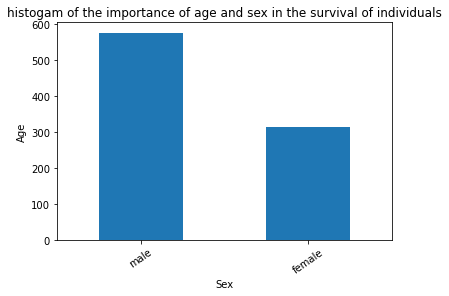

In [6]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

plt.title('histogam of the importance of age and sex in the survival of individuals')
plt.ylabel('Age')
plt.xlabel('Sex')
vc=df['Sex'].value_counts()
vc.plot.bar(rot=35)
plt.show()


In [5]:
#we cant to see the impact of Sex on the variable Age
cleanup={"Age":{"yes":31.0, "no": 29.0}}  # at first, let's convert Age to numerical format
df.replace(cleanup, inplace=True)
df[["Sex", "Age"]].groupby(["Sex"], as_index=True).mean()


#we cant to see the impact of Sex on the variable Age
cleanup={"Age":{"yes":31.0, "no": 29.0}}  # at first, let's convert Age to numerical format
df.replace(cleanup, inplace=True)
df[["Sex", "Age"]].groupby(["Sex"], as_index=True).mean()

,Age
Sex,
female,27.915709
male,30.726645


,PassengerId,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Pclass,-0.035144,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,-0.549500,0.096067,0.159651,0.216225,1.000000


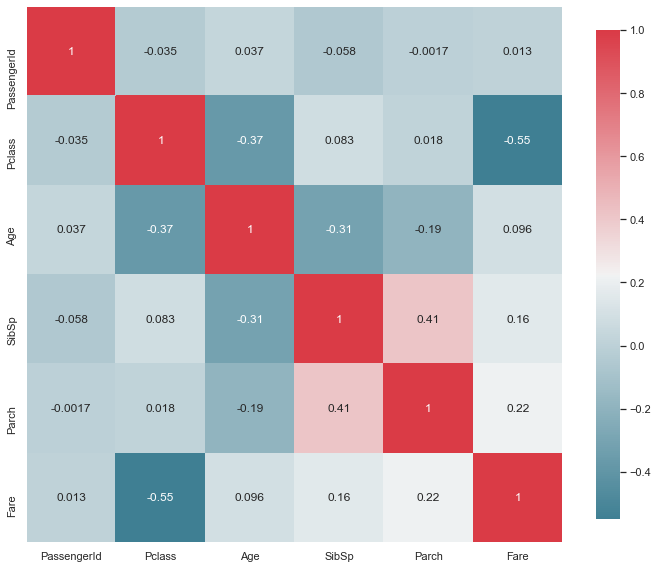

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

df = pd.read_csv('titanic-passengers.csv', encoding = "ISO-8859-1",sep=";")
corr = df.corr()
s , ax = plt.subplots( figsize =( 12 , 10 ) )
cmap = sns.diverging_palette ( 220 , 10 , as_cmap = True )
s=sns.heatmap(
    corr, 
    cmap = cmap,
    square=True, 
    cbar_kws={'shrink':.9}, 
    ax=ax, 
    annot = True, 
    annot_kws = {'fontsize':12 }
      )
#display map
corr

In [8]:
df.groupby(["Pclass", "Survived"]).mean()

PassengerId        Age     SibSp     Parch       Fare
Pclass Survived                                                       
1      No         410.300000  43.695312  0.287500  0.300000  64.684008
       Yes        491.772059  35.368197  0.492647  0.389706  95.608029
2      No         452.123711  33.544444  0.319588  0.144330  19.412328
       Yes        439.080460  25.901566  0.494253  0.643678  22.055700
3      No         453.580645  26.555556  0.672043  0.384409  13.669364
       Yes        394.058824  20.646118  0.436975  0.420168  13.694887

In [12]:
import pandas as pd
df = pd.read_csv('titanic-passengers.csv', encoding = "ISO-8859-1",sep=";")
df=df.drop(['SibSp','Pclass','Name','Parch','Ticket','Fare','Cabin','Embarked'] ,axis=1)
df.head()

,PassengerId,Survived,Sex,Age
0,343,No,male,28.0
1,76,No,male,25.0
2,641,No,male,20.0
3,568,No,female,29.0
4,672,No,male,31.0
